In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import seaborn as sns

In [4]:
# Load the dataset

In [5]:
file_path = 'D:/M.Sc Data Science/TM_Project/SAML-D.csv'
df = pd.read_csv(file_path)

In [8]:
# Display the first few rows to understand the structure
print(df.head())

       Time        Date  Sender_account  Receiver_account    Amount  \
0  10:35:19  07-10-2022      8724731955        2769355426   1459.15   
1  10:35:20  07-10-2022      1491989064        8401255335   6019.64   
2  10:35:20  07-10-2022       287305149        4404767002  14328.44   
3  10:35:21  07-10-2022      5376652437        9600420220  11895.00   
4  10:35:21  07-10-2022      9614186178        3803336972    115.25   

  Payment_currency Received_currency Sender_bank_location  \
0        UK pounds         UK pounds                   UK   
1        UK pounds            Dirham                   UK   
2        UK pounds         UK pounds                   UK   
3        UK pounds         UK pounds                   UK   
4        UK pounds         UK pounds                   UK   

  Receiver_bank_location  Payment_type  Is_laundering  
0                     UK  Cash Deposit              0  
1                    UAE  Cross-border              0  
2                     UK        Cheque

In [9]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Time                      0
Date                      0
Sender_account            0
Receiver_account          0
Amount                    0
Payment_currency          0
Received_currency         0
Sender_bank_location      0
Receiver_bank_location    0
Payment_type              0
Is_laundering             0
dtype: int64


In [13]:
# Define the categorical and numerical features
categorical_features = ['Payment_currency', 'Received_currency', 'Sender_bank_location', 
                        'Receiver_bank_location', 'Payment_type']
numerical_features = ['Amount']

In [15]:
# Split the dataset into features (X) and target (y)
X = df[categorical_features + numerical_features]
y = df['Is_laundering']

In [17]:
# Split the data into training and testing sets (60-40 split)
random_state_value = 35
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=random_state_value)

In [71]:
#** Predicting Transactions Using Logistic Regression **

In [19]:
# Preprocessor: OneHotEncoder for categorical features and StandardScaler for numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [21]:
# Fit and transform the training data using the preprocessor
X_train_processed = preprocessor.fit_transform(X_train)

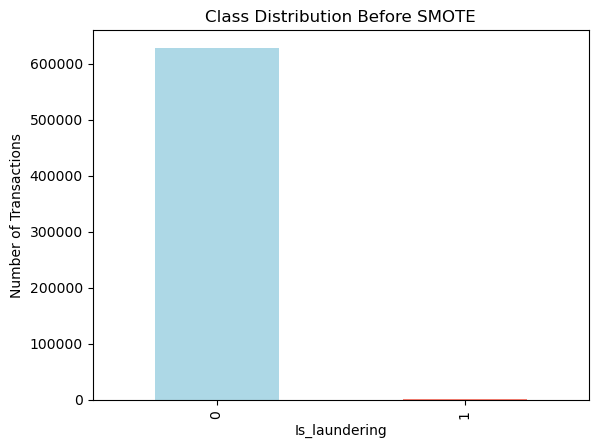

In [109]:
# Plot class distribution before SMOTE
y_train.value_counts().plot(kind='bar', title='Class Distribution Before SMOTE', color=['lightblue', 'salmon'])
plt.ylabel('Number of Transactions')
plt.show()

In [23]:
# Apply SMOTE for balancing the dataset (only on the transformed training set)
smote = SMOTE(random_state=random_state_value, sampling_strategy=0.5)  # Balance the minority class more
X_train_res, y_train_res = smote.fit_resample(X_train_processed, y_train)

In [25]:
# Visualize class distribution after applying SMOTE
print("Class distribution after SMOTE:")
print(y_train_res.value_counts())

Class distribution after SMOTE:
Is_laundering
0    628576
1    314288
Name: count, dtype: int64


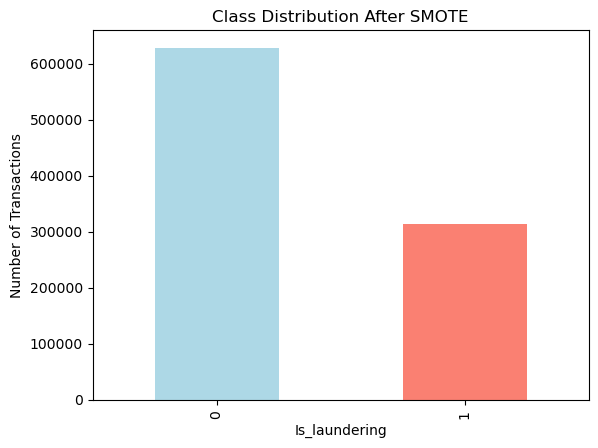

In [27]:
# Plot after SMOTE
y_train_res.value_counts().plot(kind='bar', title='Class Distribution After SMOTE', color=['lightblue', 'salmon'])
plt.ylabel('Number of Transactions')
plt.show()


In [29]:
# **Logistic Regression with Class Weights**
# Train a Logistic Regression model with class_weight='balanced'
model = LogisticRegression(random_state=random_state_value, 
                           class_weight='balanced', 
                           solver='liblinear',  # Use 'liblinear' solver
                           max_iter=1000)

model.fit(X_train_res, y_train_res)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=35,
                   solver='liblinear')

In [30]:
# Predict on the test set
X_test_processed = preprocessor.transform(X_test)
y_pred = model.predict(X_test_processed)

In [31]:
# Evaluate the Logistic Regression model
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred))


Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       1.00      0.86      0.93    419043
           1       0.00      0.56      0.01       387

    accuracy                           0.86    419430
   macro avg       0.50      0.71      0.47    419430
weighted avg       1.00      0.86      0.93    419430



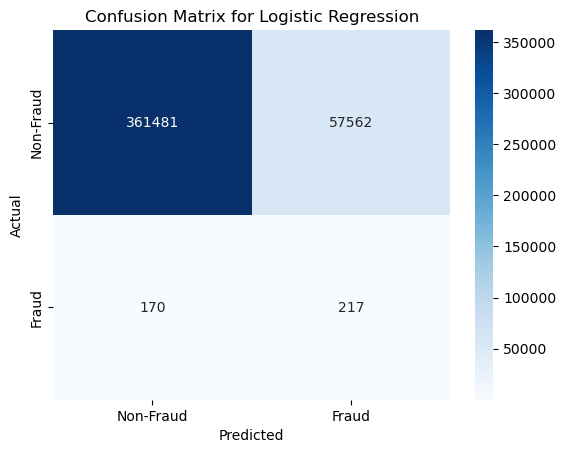

In [35]:
# Confusion Matrix for Logistic Regression
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix for Logistic Regression")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

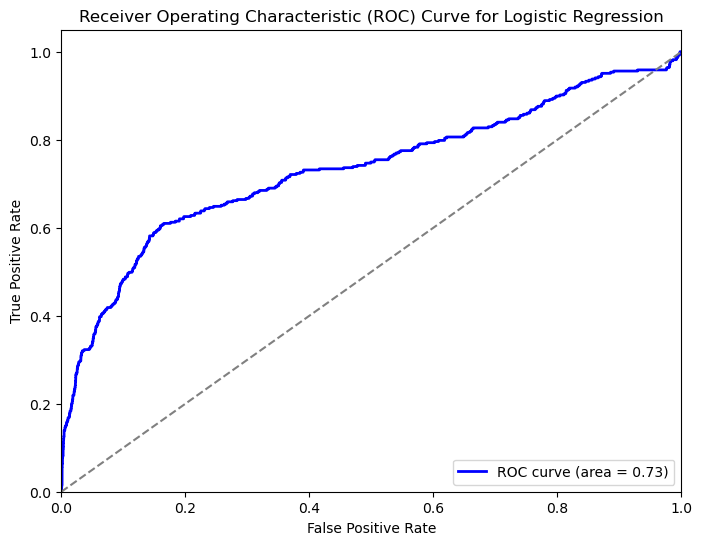

In [37]:
# ROC Curve and AUC for Logistic Regression
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test_processed)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

In [111]:
# Save the best model's predictions to a new CSV file (Logistic Regression)
new_data_path = 'D:/M.Sc Data Science/TM_Project/Test_transactionsdata.csv'
new_data = pd.read_csv(new_data_path)

In [51]:
# Display the first few rows to understand the structure
print(new_data.head())

    Time        Date      Sender_account    Receiver_account  Amount  \
0  00:56   3/26/2023  CGSW53767242388496  NBGQ59770348247710    7370   
1  03:34  10/27/2020  SMLH28710122691669  UTZH24808613171274     960   
2  15:29   1/20/2023  OQIR01845146270482  QWIN77378263982146    5490   
3  08:06  12-04-2022  QDUJ89325288095701  KZQI04499727875588    5291   
4  21:22   2/18/2025  LZJH03911718227824  MOKG39636057662702    5834   

  Payment_currency Received_currency Sender_bank_location  \
0              INR               INR          Pollardfort   
1              AUD               EUR          Port Dennis   
2              GBP               USD       Johnsonborough   
3              USD               AUD        Port Jameston   
4              INR               GBP           Sarahhaven   

  Receiver_bank_location     Payment_type  Is_laundering  
0                Shawton  Online Transfer            NaN  
1          New Ericburgh  Online Transfer            NaN  
2             West Sara

In [53]:
# Preprocess the new data using the same fitted preprocessor (with the encoder trained on the training data)
X_new = new_data[categorical_features + numerical_features]

In [55]:
# Transform the new data using the preprocessor (the same one fitted on the training data)
X_new_processed = preprocessor.transform(X_new)

In [57]:
# Make predictions using the trained Logistic Regression model
y_new_pred = model.predict(X_new_processed)

In [59]:
# Add the predictions to the new data
new_data['Predicted_Is_laundering'] = y_new_pred

In [61]:
# Save the new data with predictions to a CSV file
output_file_path = 'D:/M.Sc Data Science/TM_Project/transactions_predictions_using_Logistic.csv'
new_data.to_csv(output_file_path, index=False)

In [63]:
# Display the results
print("Predictions saved successfully!")
print(new_data.head())

Predictions saved successfully!
    Time        Date      Sender_account    Receiver_account  Amount  \
0  00:56   3/26/2023  CGSW53767242388496  NBGQ59770348247710    7370   
1  03:34  10/27/2020  SMLH28710122691669  UTZH24808613171274     960   
2  15:29   1/20/2023  OQIR01845146270482  QWIN77378263982146    5490   
3  08:06  12-04-2022  QDUJ89325288095701  KZQI04499727875588    5291   
4  21:22   2/18/2025  LZJH03911718227824  MOKG39636057662702    5834   

  Payment_currency Received_currency Sender_bank_location  \
0              INR               INR          Pollardfort   
1              AUD               EUR          Port Dennis   
2              GBP               USD       Johnsonborough   
3              USD               AUD        Port Jameston   
4              INR               GBP           Sarahhaven   

  Receiver_bank_location     Payment_type  Is_laundering  \
0                Shawton  Online Transfer            NaN   
1          New Ericburgh  Online Transfer       

In [73]:
# **Random Forest Classifier (Optimized)**
# Train the Random Forest model with parallelism and a smaller number of trees for faster training
rf_model = RandomForestClassifier(random_state=random_state_value, 
                                  class_weight='balanced', 
                                  n_estimators=10,  # Use fewer trees for faster training
                                  max_depth=10,  # Limit tree depth
                                  n_jobs=-1)  # Use all available processors for faster training


In [75]:
import logging

In [77]:
logging.info("Training the Random Forest model...")
rf_model.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', max_depth=10, n_estimators=10,
                       n_jobs=-1, random_state=35)

In [79]:
# Predict on the test set using Random Forest
X_test_processed = preprocessor.transform(X_test)
y_pred_rf = rf_model.predict(X_test_processed)

In [81]:
# Evaluate the Random Forest model
logging.info("Classification Report (Random Forest):")
logging.info(classification_report(y_test, y_pred_rf))

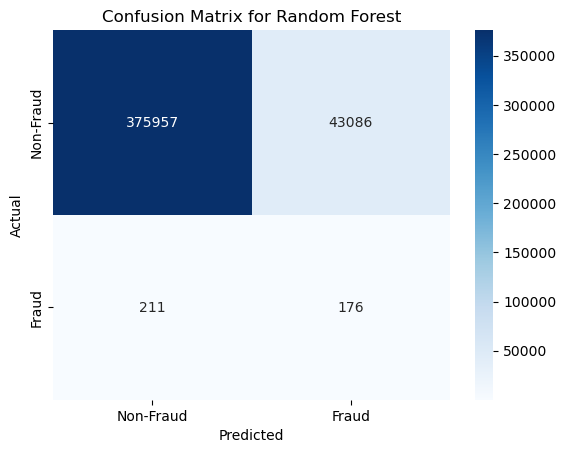

In [83]:
# Confusion Matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix for Random Forest")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

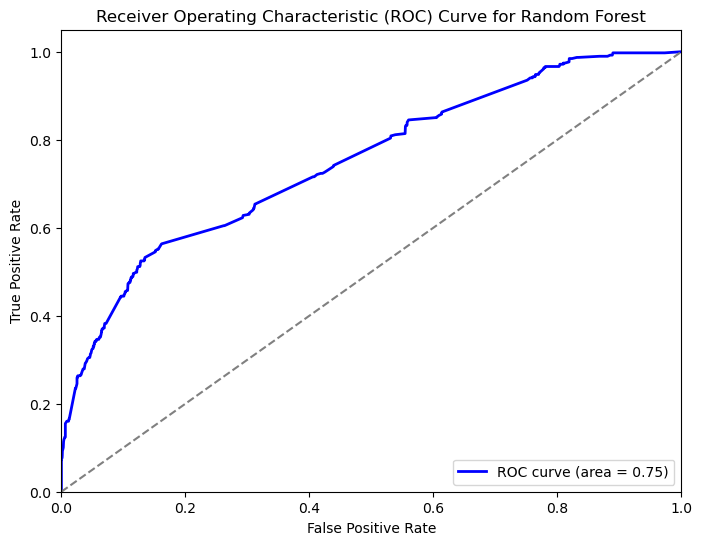

In [85]:
# ROC Curve and AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test_processed)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label=f'ROC curve (area = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

In [113]:
# Save the best model's predictions to a new CSV file (Random Forest in this case)
new_data_path = 'D:/M.Sc Data Science/TM_Project/Test_transactionsdata.csv'
new_data = pd.read_csv(new_data_path)


In [115]:
# Display the first few rows to understand the structure
print(new_data.head())

    Time        Date      Sender_account    Receiver_account  Amount  \
0  00:56   3/26/2023  CGSW53767242388496  NBGQ59770348247710    7370   
1  03:34  10/27/2020  SMLH28710122691669  UTZH24808613171274     960   
2  15:29   1/20/2023  OQIR01845146270482  QWIN77378263982146    5490   
3  08:06  12-04-2022  QDUJ89325288095701  KZQI04499727875588    5291   
4  21:22   2/18/2025  LZJH03911718227824  MOKG39636057662702    5834   

  Payment_currency Received_currency Sender_bank_location  \
0              INR               INR          Pollardfort   
1              AUD               EUR          Port Dennis   
2              GBP               USD       Johnsonborough   
3              USD               AUD        Port Jameston   
4              INR               GBP           Sarahhaven   

  Receiver_bank_location     Payment_type  Is_laundering  
0                Shawton  Online Transfer            NaN  
1          New Ericburgh  Online Transfer            NaN  
2             West Sara

In [95]:
# Preprocess the new data using the same fitted preprocessor (with the encoder trained on the training data)
X_new = new_data[categorical_features + numerical_features]

In [97]:
# Transform the new data using the preprocessor (the same one fitted on the training data)
X_new_processed = preprocessor.transform(X_new)

In [99]:
# Make predictions using the trained Random Forest model
y_new_pred = rf_model.predict(X_new_processed)


In [101]:
# **Update the 'Is_laundering' column with the predictions**
new_data['Is_laundering'] = y_new_pred  # Save predictions into the 'Is_laundering' column

In [105]:
# Save the new data with updated predictions to a CSV file
output_file_path = 'D:/M.Sc Data Science/TM_Project/transactions_predictions_using_RandomForest.csv'
new_data.to_csv(output_file_path, index=False)

In [107]:
# Display the results
print("Predictions saved successfully!")
print(new_data.head())

Predictions saved successfully!
    Time        Date      Sender_account    Receiver_account  Amount  \
0  00:56   3/26/2023  CGSW53767242388496  NBGQ59770348247710    7370   
1  03:34  10/27/2020  SMLH28710122691669  UTZH24808613171274     960   
2  15:29   1/20/2023  OQIR01845146270482  QWIN77378263982146    5490   
3  08:06  12-04-2022  QDUJ89325288095701  KZQI04499727875588    5291   
4  21:22   2/18/2025  LZJH03911718227824  MOKG39636057662702    5834   

  Payment_currency Received_currency Sender_bank_location  \
0              INR               INR          Pollardfort   
1              AUD               EUR          Port Dennis   
2              GBP               USD       Johnsonborough   
3              USD               AUD        Port Jameston   
4              INR               GBP           Sarahhaven   

  Receiver_bank_location     Payment_type  Is_laundering  
0                Shawton  Online Transfer              1  
1          New Ericburgh  Online Transfer         